In [1]:
import pymer4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("results.csv")
df["genus"] = df["species"].apply(lambda x: x.split()[0])
df.head(10)

,species,year,ssp,range_mean_suitability,range_size,range_centroid_x,range_centroid_y,eval_runtime,eval_training_auc,eval_testing_auc,...,PFT1,PFT7,Bioclim11,PFT13,Rainfed,PFT12,Irrigated,PFT31,PFT11,genus
0,Argia fumipennis,2020,NaN,0.0883,4545270,-86.3322,37.9753,1424.9932,0.858,0.9492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
1,Argia fumipennis,2050,ssp1,0.0850,4145555,-85.3865,38.8458,773.6632,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
2,Argia fumipennis,2050,ssp2,0.0885,4039160,-85.7990,39.1220,773.5852,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
3,Argia fumipennis,2050,ssp5,0.0800,3227687,-85.9047,41.1435,778.1869,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
4,Argia fumipennis,2075,ssp1,0.0838,3762274,-84.7051,39.8653,770.8865,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
5,Argia fumipennis,2075,ssp2,0.0782,2953655,-84.2005,41.8290,776.0932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
6,Argia fumipennis,2075,ssp5,0.0639,2378520,-87.7997,42.6984,770.8644,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
7,Argia fumipennis,2100,ssp1,0.0940,4708113,-86.8774,39.0628,787.0483,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
8,Argia fumipennis,2100,ssp2,0.0837,3141469,-84.7200,42.5244,776.5508,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia
9,Argia fumipennis,2100,ssp5,0.0477,1391970,-90.2131,44.5034,772.0340,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argia


In [3]:
colors = { 
    "Argia": "tab:orange", 
    "Aeshna": "tab:blue", 
    "Calopteryx": "tab:green", 
    "Hetaerina": "tab:red", 
    "Libellula": "tab:purple", 
    "Sympetrum": "tab:pink",
    "Plathemis": "tab:brown"
}
markers = {
    "ssp1": "^",
    "ssp2": "o",
    "ssp5": "s"
}
linestyles = {
    "ssp1": "--",
    "ssp2": "-", 
    "ssp5": ":"
}
years = [2020, 2050, 2075, 2100]
years_future = [2050, 2075, 2100]
ssps = ["ssp1", "ssp2", "ssp5"]
species_list = df["species"].unique()
species_list = np.insert(species_list[:-2], 18, species_list[-2:])

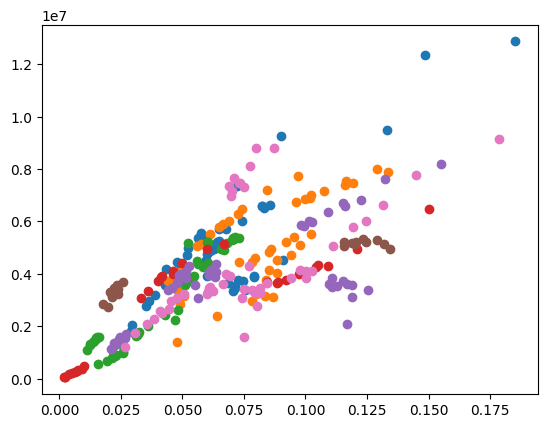

PearsonRResult(statistic=np.float64(0.745726194160871), pvalue=np.float64(1.718403738160484e-54))

In [4]:
# Plot the correlation between mean suitability and range size
# Subsequent analysis will focus more on range size

df.groupby("genus").apply(lambda row: plt.scatter(row["range_mean_suitability"], row["range_size"]), include_groups=False)
plt.show()

pearsonr(df["range_mean_suitability"], df["range_size"])

In [5]:
def calculate_temporal_changes(species, year, ssp, metric): 
    if metric == "range": 
        return df[(df["species"] == species) & (df["year"] == year) & (df["ssp"] == ssp)]["range_size"].iloc[0] /\
               df[(df["species"] == species) & (df["year"] == 2020)]["range_size"].iloc[0] * 100
    if metric == "distance":
        return geodesic((df[(df["species"] == species) & (df["year"] == year) & (df["ssp"] == ssp)]["range_centroid_y"].iloc[0],\
                         df[(df["species"] == species) & (df["year"] == year) & (df["ssp"] == ssp)]["range_centroid_x"].iloc[0]),\
                        (df[(df["species"] == species) & (df["year"] == 2020)]["range_centroid_y"].iloc[0],\
                         df[(df["species"] == species) & (df["year"] == 2020)]["range_centroid_x"].iloc[0])).km
    if metric == "centroid_x": 
        return round(df[(df["species"] == species) & (df["year"] == year) & (df["ssp"] == ssp)]["range_centroid_x"].iloc[0] -\
                     df[(df["species"] == species) & (df["year"] == 2020)]["range_centroid_x"].iloc[0], 4)
    if metric == "centroid_y": 
        return round(df[(df["species"] == species) & (df["year"] == year) & (df["ssp"] == ssp)]["range_centroid_y"].iloc[0] -\
                     df[(df["species"] == species) & (df["year"] == 2020)]["range_centroid_y"].iloc[0], 4)

In [6]:
temporal_changes = df[["species", "genus", "ssp"]].drop_duplicates().dropna()

for metric in ["range", "distance", "centroid_x", "centroid_y"]: 
    for year in years_future:
        temporal_changes[f"{str(year)}_{metric}"] = temporal_changes.apply(lambda row: calculate_temporal_changes(row["species"], year, row["ssp"], metric), axis=1)

temporal_changes.insert(3, "2020_range", 100)
temporal_changes.insert(7, "2020_distance", 0)
temporal_changes.insert(11, "2020_centroid_x", 0)
temporal_changes.insert(15, "2020_centroid_y", 0)
temporal_changes.reset_index(drop=True, inplace=True)

temporal_changes.head(6)

,species,genus,ssp,2020_range,2050_range,2075_range,2100_range,2020_distance,2050_distance,2075_distance,2100_distance,2020_centroid_x,2050_centroid_x,2075_centroid_x,2100_centroid_x,2020_centroid_y,2050_centroid_y,2075_centroid_y,2100_centroid_y
0,Argia fumipennis,Argia,ssp1,100,91.205913,82.773389,103.582691,0,127.118792,252.840810,129.744601,0,0.9457,1.6271,-0.5452,0,0.8705,1.8900,1.0875
1,Argia fumipennis,Argia,ssp2,100,88.865128,64.983048,69.115124,0,135.511768,465.056984,523.392666,0,0.5332,2.1317,1.6122,0,1.1467,3.8537,4.5491
2,Argia fumipennis,Argia,ssp5,100,71.011997,52.329565,30.624583,0,353.665275,539.053094,794.402339,0,0.4275,-1.4675,-3.8809,0,3.1682,4.7231,6.5281
3,Argia apicalis,Argia,ssp1,100,104.071098,100.606918,109.107378,0,29.832818,66.989890,45.332877,0,-0.0526,0.5872,-0.0447,0,0.2655,0.3803,0.4069
4,Argia apicalis,Argia,ssp2,100,111.301271,121.907781,124.580637,0,85.346531,175.146841,234.851879,0,0.1040,0.7497,0.9967,0,0.7645,1.4619,1.9640
5,Argia apicalis,Argia,ssp5,100,117.252999,115.321822,70.329246,0,156.858815,422.396153,677.327223,0,0.4814,1.2174,2.0889,0,1.3607,3.6845,5.8860


In [7]:
column_names = {
    "range": temporal_changes.columns[3:7],
    "distance": temporal_changes.columns[7:11],
    "centroid_x": temporal_changes.columns[11:15],
    "centroid_y": temporal_changes.columns[15:19]
}

column_names

{'range': Index(['2020_range', '2050_range', '2075_range', '2100_range'], dtype='object'),
 'distance': Index(['2020_distance', '2050_distance', '2075_distance', '2100_distance'], dtype='object'),
 'centroid_x': Index(['2020_centroid_x', '2050_centroid_x', '2075_centroid_x',
        '2100_centroid_x'],
       dtype='object'),
 'centroid_y': Index(['2020_centroid_y', '2050_centroid_y', '2075_centroid_y',
        '2100_centroid_y'],
       dtype='object')}

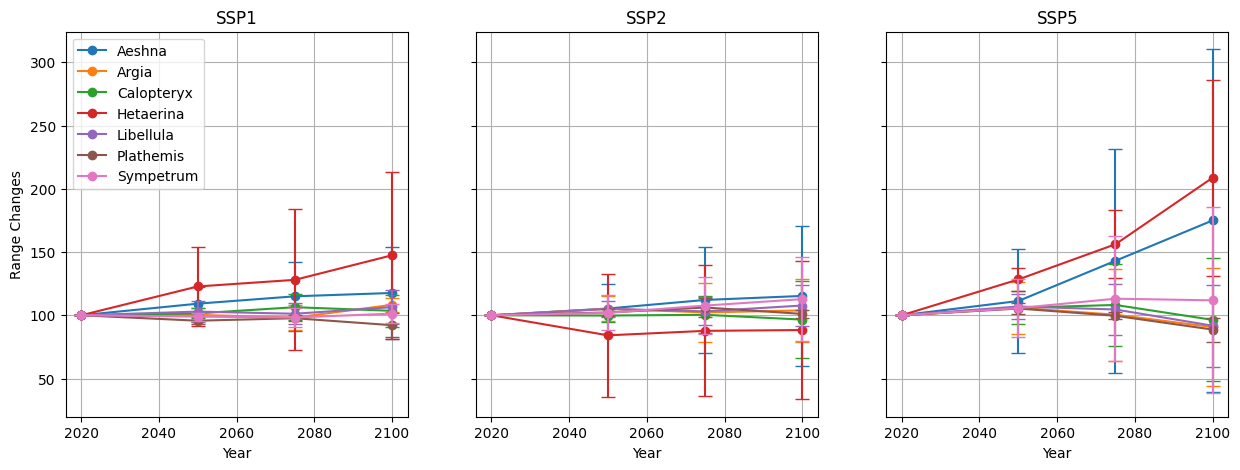

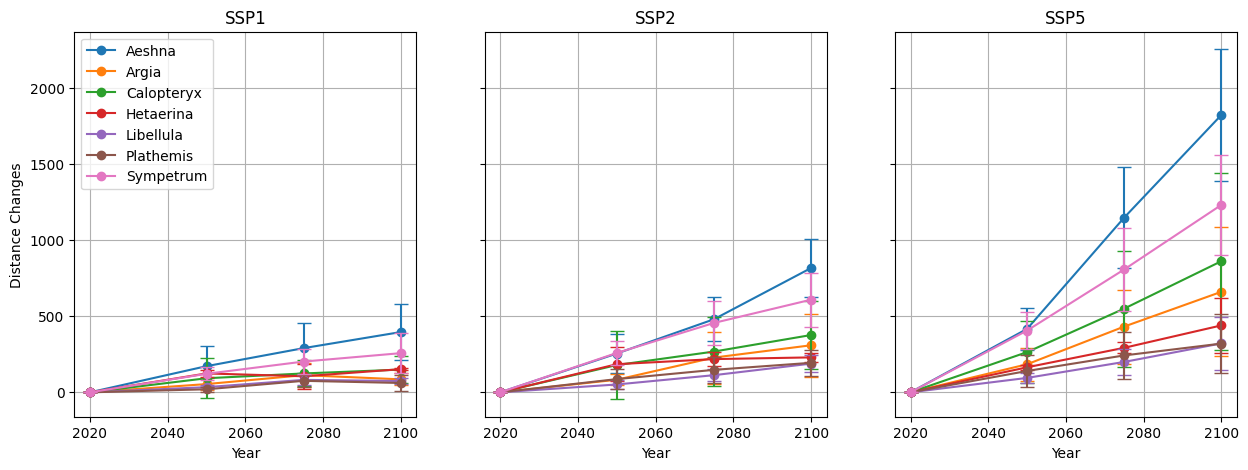

In [8]:
for metric in ["range", "distance"]:

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
    
    for i, ssp in enumerate(ssps):
        ax = axes[i]
        mean = temporal_changes[temporal_changes["ssp"] == ssp].groupby("genus")[column_names[metric]].mean()
        std = temporal_changes[temporal_changes["ssp"] == ssp].groupby("genus")[column_names[metric]].std()

        for genus in mean.index: 
            ax.plot(years, mean.loc[genus], color=colors[genus], marker="o", label=genus)
            ax.errorbar(years, mean.loc[genus], yerr=std.loc[genus], fmt="none", color=colors[genus], capsize=5)
    
        ax.set_title(ssp.upper())
        ax.set_xlabel("Year")
        ax.grid()
    
    axes[0].set_ylabel(f"{metric.title()} Changes")
    axes[0].legend(loc="upper left")
    fig.align_labels()
    
    plt.savefig(f"images/{metric}_changes.png", dpi=500, transparent=True)

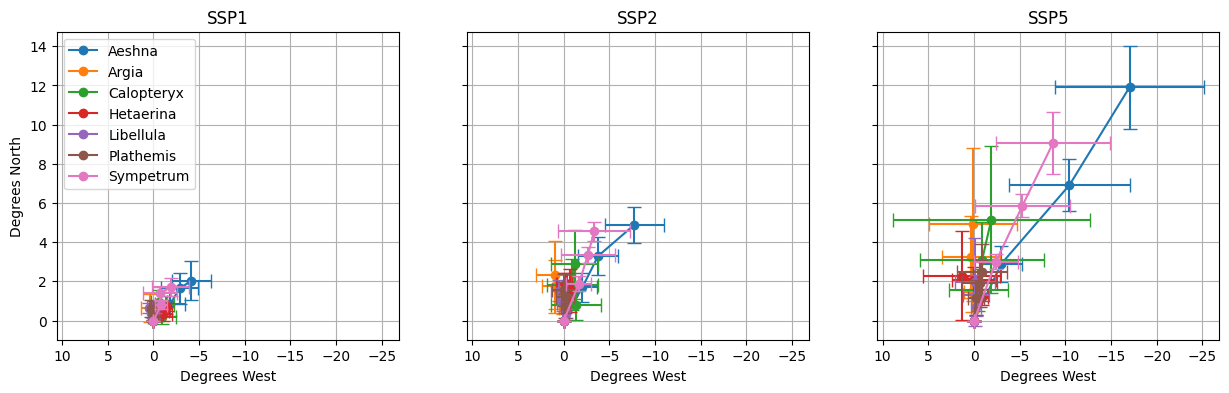

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True, sharey=True)

for i, ssp in enumerate(ssps):
    ax = axes[i]
    mean_x = temporal_changes[temporal_changes["ssp"] == ssp].groupby("genus")[column_names["centroid_x"]].mean()
    std_x = temporal_changes[temporal_changes["ssp"] == ssp].groupby("genus")[column_names["centroid_x"]].std()
    mean_y = temporal_changes[temporal_changes["ssp"] == ssp].groupby("genus")[column_names["centroid_y"]].mean()
    std_y = temporal_changes[temporal_changes["ssp"] == ssp].groupby("genus")[column_names["centroid_y"]].std()

    for genus in mean_x.index: 
        ax.plot(mean_x.loc[genus], mean_y.loc[genus], color=colors[genus], marker="o", label=genus)
        ax.errorbar(mean_x.loc[genus], mean_y.loc[genus], xerr=std_x.loc[genus], yerr=std_y.loc[genus], fmt="none", color=colors[genus], capsize=5)
    
    ax.set_title(ssp.upper())
    ax.set_xlabel("Degrees West")
    ax.grid()
        
axes[0].set_ylabel("Degrees North")
axes[0].legend(loc="upper left")
fig.align_labels()

plt.gca().invert_xaxis()
plt.savefig("images/centroid_changes.png", dpi=500, transparent=True)

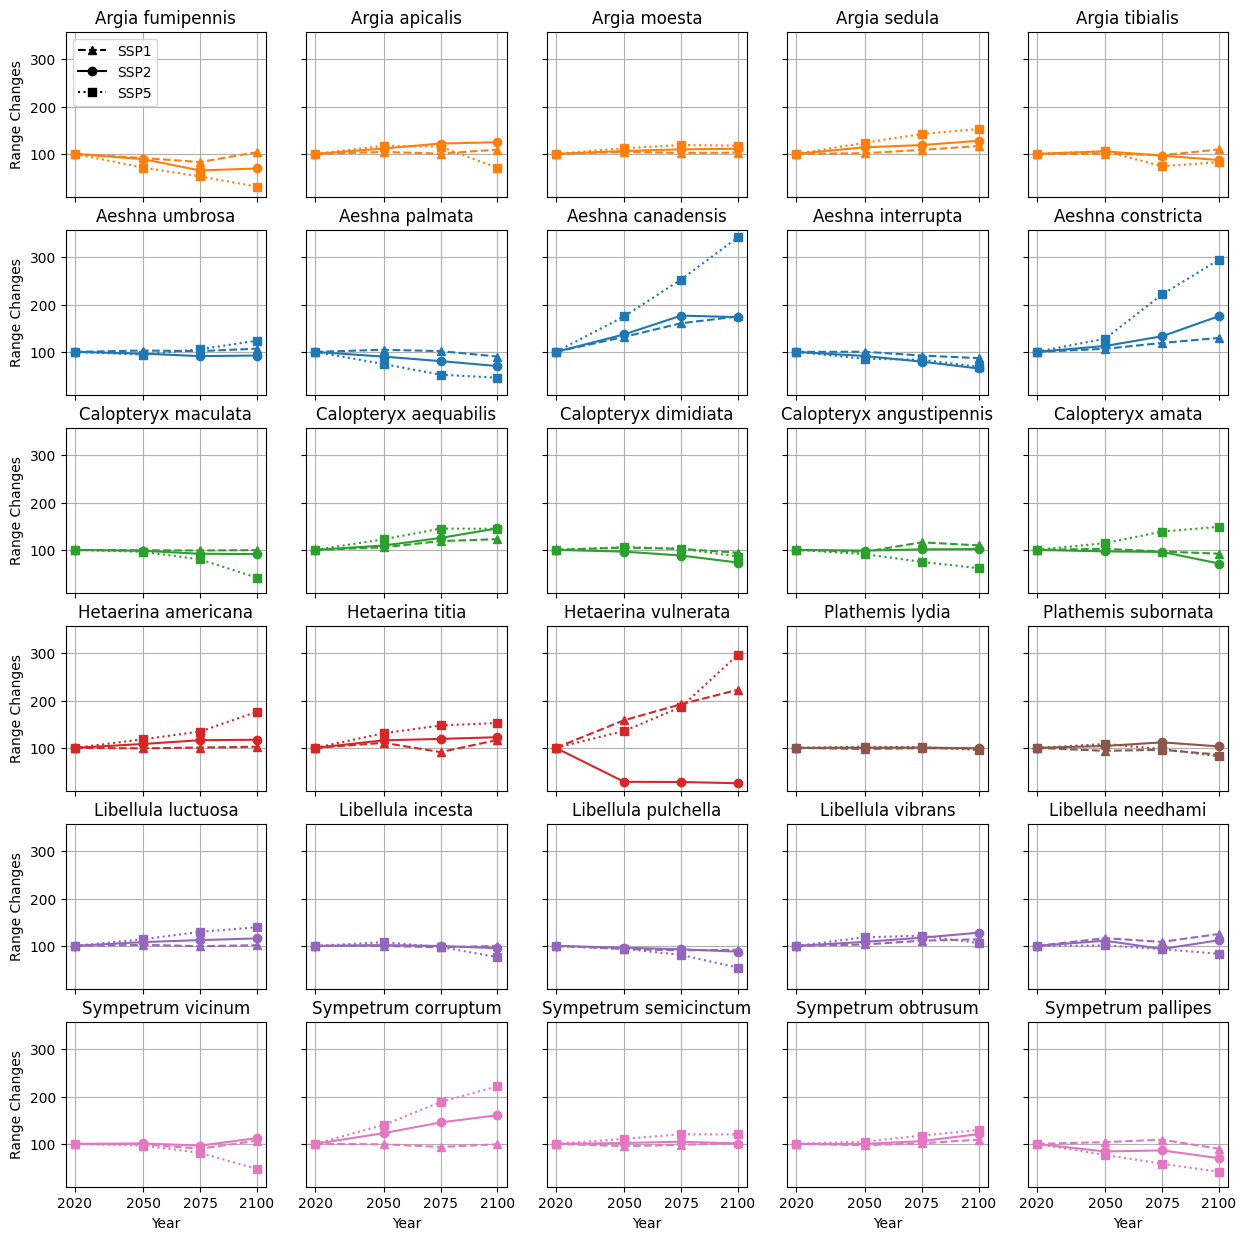

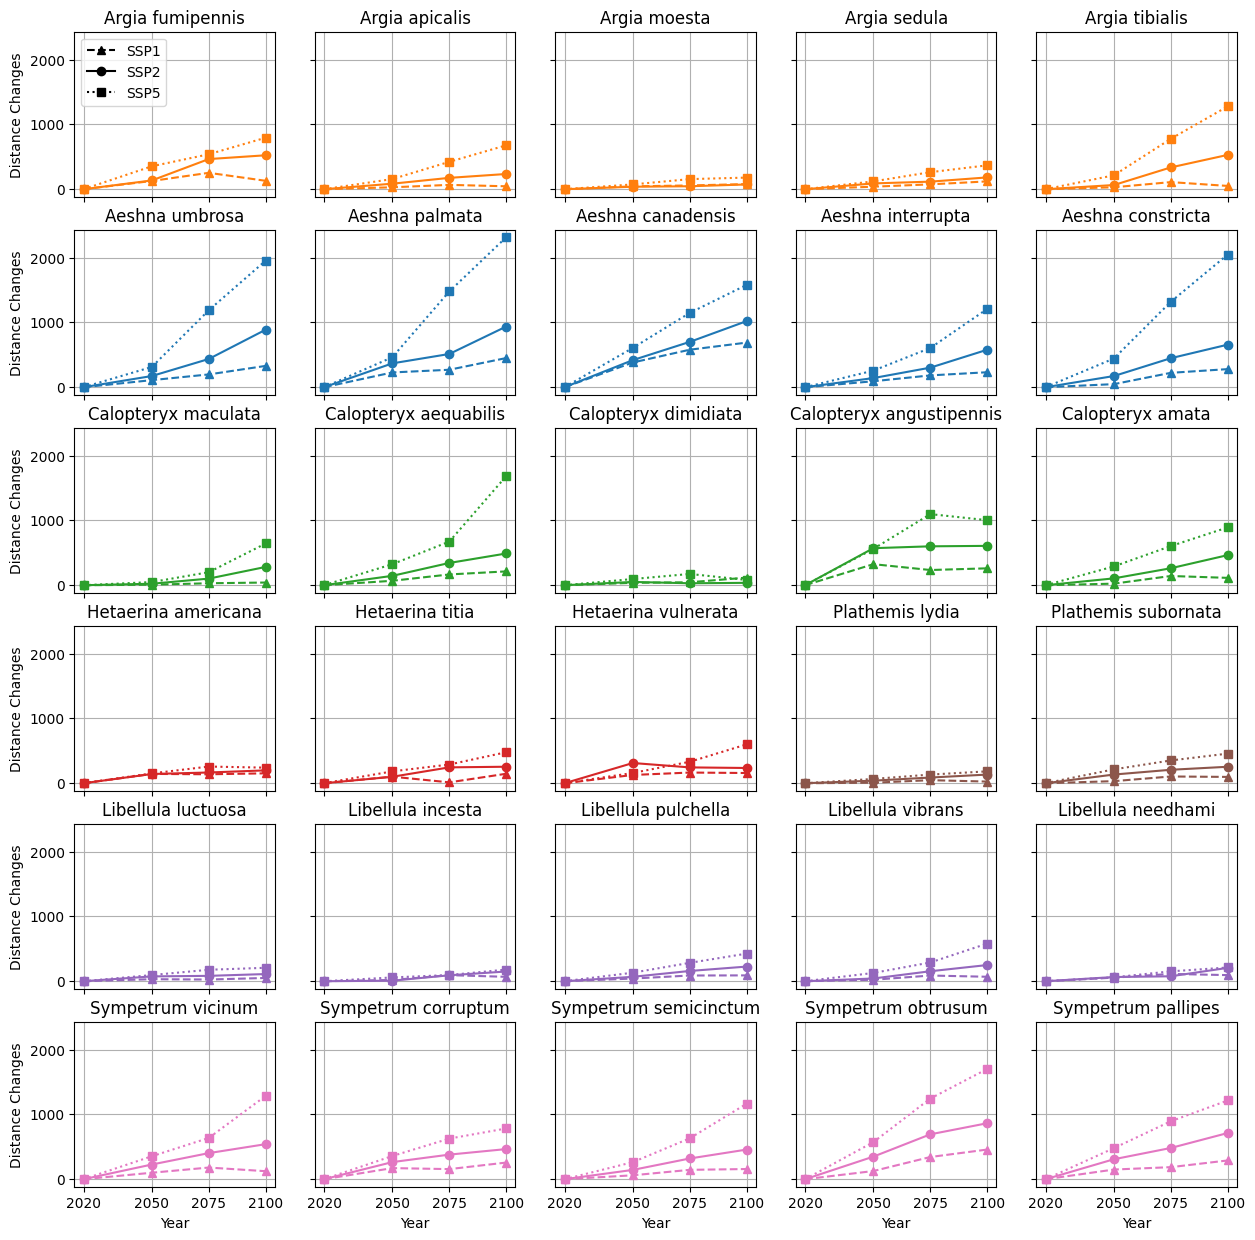

In [10]:
for metric in ["range", "distance"]:

    fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15), sharex=True, sharey=True)
    axes = axes.flatten()  # Convert 2D array to 1D for easy indexing
    
    for i, species in enumerate(species_list):
        ax = axes[i]
        for ssp in ssps:
            # Select row
            data = temporal_changes[(temporal_changes["species"] == species) & (temporal_changes["ssp"] == ssp)][column_names[metric]]
            # Plot 2020 range, 2050 range, 2075 range, 2100 range
            ax.plot(years, data.values.reshape(-1), color=colors[species.split()[0]], marker=markers[ssp], linestyle=linestyles[ssp])

        ax.set_xticks(years)
        ax.set_title(species)
        ax.grid()
        row, col = divmod(i, 5)
        if col == 0:
            ax.set_ylabel(f"{metric.title()} Changes")
        if row == 5:
            ax.set_xlabel("Year")

    for ssp in ssps:
        axes[0].plot([], [], color="black", marker=markers[ssp], linestyle=linestyles[ssp], label=ssp.upper())
    axes[0].legend(loc="upper left")
    
    plt.savefig(f"images/{metric}_changes_species.png", dpi=500, transparent=True)

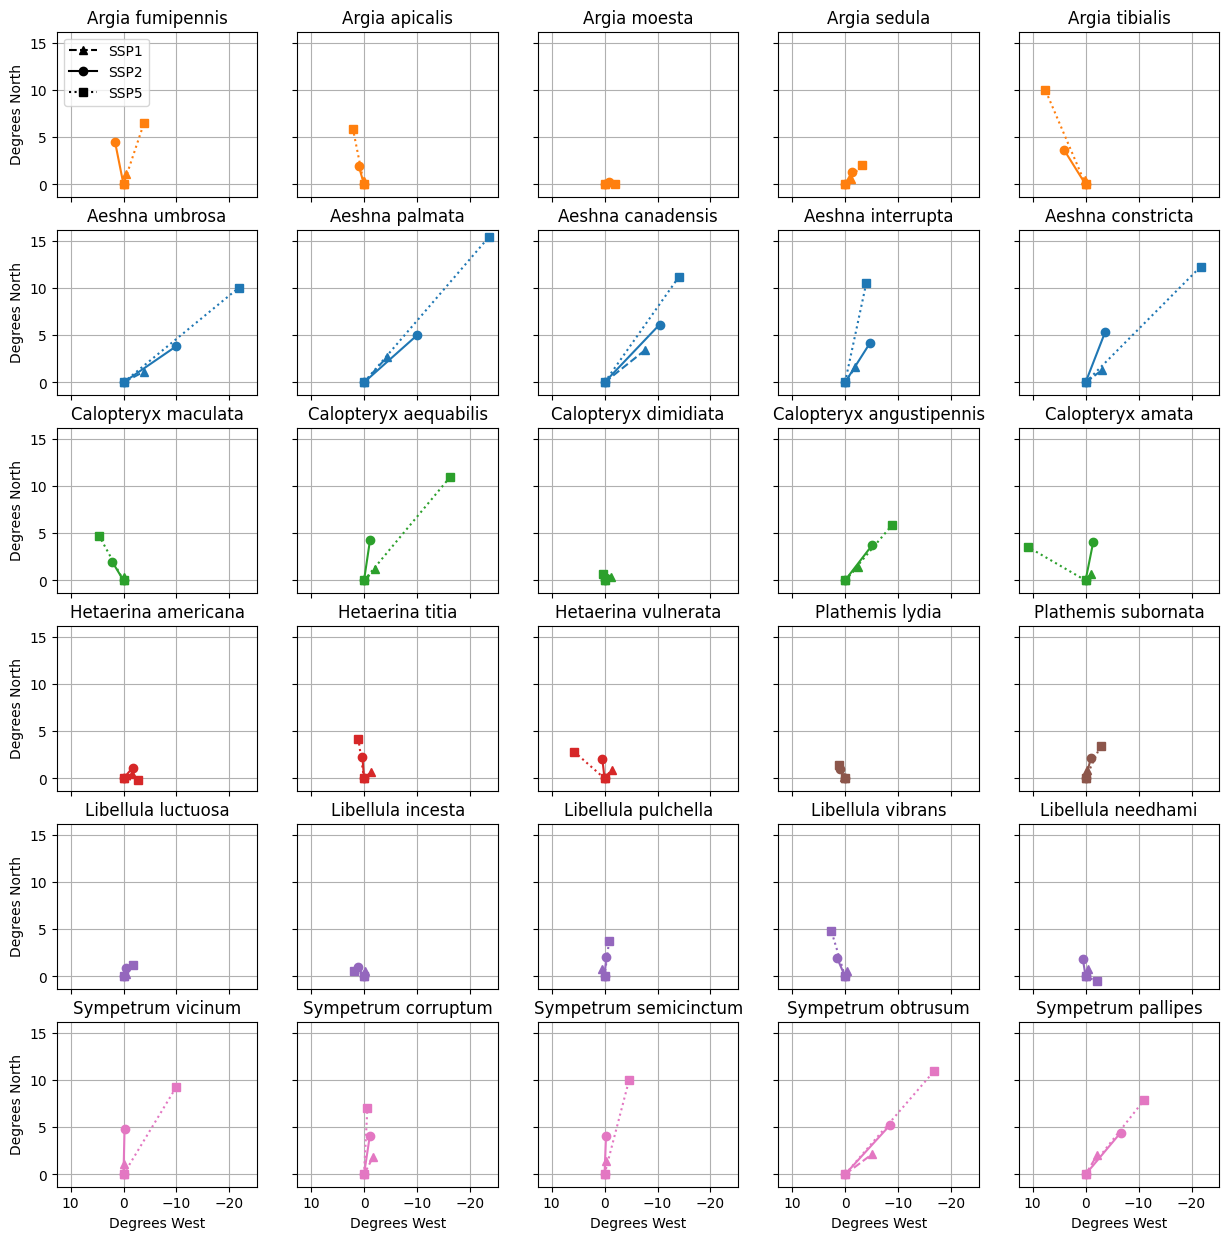

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()
    
for i, species in enumerate(species_list):
    ax = axes[i]
    for ssp in ssps:
        # Select row
        data_x = temporal_changes[(temporal_changes["species"] == species) & (temporal_changes["ssp"] == ssp)][column_names["centroid_x"]]
        data_y = temporal_changes[(temporal_changes["species"] == species) & (temporal_changes["ssp"] == ssp)][column_names["centroid_y"]]
        # Plot 2020 range, 2050 range, 2075 range, 2100 range
        ax.plot(data_x.values.reshape(-1).take([0, -1]), data_y.values.reshape(-1).take([0, -1]), color=colors[species.split()[0]], marker=markers[ssp], linestyle=linestyles[ssp])

    ax.set_title(species)
    ax.grid()
    row, col = divmod(i, 5)
    if col == 0:
        ax.set_ylabel("Degrees North")
    if row == 5:
        ax.set_xlabel("Degrees West")

for ssp in ssps:
    axes[0].plot([], [], color="black", marker=markers[ssp], linestyle=linestyles[ssp], label=ssp.upper())
axes[0].legend(loc="upper left")

plt.gca().invert_xaxis()
plt.savefig("images/centroid_changes_species.png", dpi=500, transparent=True)

In [12]:
# Save data for R analysis

df["ssp"] = df["ssp"].fillna("baseline")
df["distance"] = df.apply(lambda x: 0 if x["year"] == "2020" else calculate_temporal_changes(x["species"], int(x["year"]), x["ssp"], "distance"), axis=1)

df.to_csv("results_processed.csv", index=False)